In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, color
from skimage import exposure
from time import time

from keras import backend
from keras.models import Sequential
from keras import layers
from keras import metrics
from keras.layers import Dense, Dropout, Activation, Flatten, Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model
from keras import backend as K
from keras.callbacks import TensorBoard



Using TensorFlow backend.


## Data

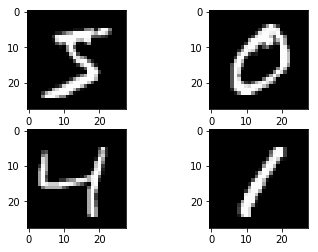

In [2]:
#MNIST
from keras.datasets import mnist
from keras.utils import np_utils

# Prepare dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Image Size
img_rows, img_cols = X_train.shape[1:]

# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

# Prepare dataset
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
nb_classes = 10
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

## Tensorboard

In [3]:
backend.clear_session()

model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(img_rows, img_cols, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', 
              metrics=[metrics.categorical_accuracy])

tensorboard = TensorBoard(log_dir="logs/", histogram_freq=1)

model.fit(X_train, Y_train, epochs=5, 
          validation_split=0.2,
          verbose=1, callbacks=[tensorboard])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               3211776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
__________

Run 

```tensorboard --logdir=your_path``` 

in a terminal, where in this case ```your_path == logs/```

## 1 API Funcional

In [4]:
backend.clear_session()


input_img = Input(shape=(28, 28, 1))  

x = Conv2D(16, (5, 5), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (5, 5), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (5, 5), activation='relu', padding='same')(x)

y = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
y = MaxPooling2D((2, 2), padding='same')(y)
y = Conv2D(16, (3, 3), activation='relu', padding='same')(y)
y = MaxPooling2D((2, 2), padding='same')(y)
y = Conv2D(16, (3, 3), activation='relu', padding='same')(y)

z = Conv2D(16, (7, 7), activation='relu', padding='same')(input_img)
z = MaxPooling2D((2, 2), padding='same')(z)
z = Conv2D(16, (7, 7), activation='relu', padding='same')(z)
z = MaxPooling2D((2, 2), padding='same')(z)
z = Conv2D(16, (7, 7), activation='relu', padding='same')(z)

out = layers.concatenate([x, y, z])
out = layers.Flatten()(out)
out = Dense(16, activation='selu')(out)
out = Dense(10, activation='softmax')(out)

m = Model(inputs=[input_img], outputs=[out])
m.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 16)   416         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 28, 28, 16)   160         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 28, 28, 16)   800         input_1[0][0]                    
__________________________________________________________________________________________________
max_poolin

In [5]:
m.compile(optimizer='adadelta', loss='binary_crossentropy')
m.fit(X_train, Y_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 83us/step - loss: 0.0486 - val_loss: 0.0157
Epoch 2/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.0134 - val_loss: 0.0112
Epoch 3/5
60000/60000 [==============================] - 4s 75us/step - loss: 0.0093 - val_loss: 0.0080
Epoch 4/5
60000/60000 [==============================] - 4s 75us/step - loss: 0.0072 - val_loss: 0.0061
Epoch 5/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.0057 - val_loss: 0.0070


## 2 ConvNets + Autoenconders

In [6]:
input_img = Input(shape=(28, 28, 1))  

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# at this point the representation is (28, 28, 1) i.e. 784-dimensional

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [7]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 8)           0         
__________

In [8]:
autoencoder.fit(X_train, X_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test, X_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.2059 - val_loss: 0.1593
Epoch 2/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.1530 - val_loss: 0.1454
Epoch 3/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.1410 - val_loss: 0.1354
Epoch 4/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.1334 - val_loss: 0.1270
Epoch 5/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.1281 - val_loss: 0.1250


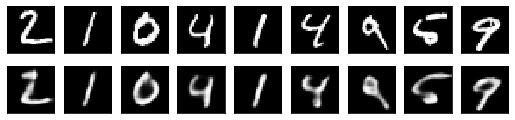

In [9]:
decoded_imgs = autoencoder.predict(X_test)

import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(10, 2))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 3 Text Classification

data: https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences

In [10]:
import pandas as pd

filepath_dict = {'yelp':   '../data/sentiment labelled sentences/yelp_labelled.txt',
                 'amazon': '../data/sentiment labelled sentences/amazon_cells_labelled.txt',
                 'imdb':   '../data/sentiment labelled sentences/imdb_labelled.txt'}

df_list = []
for source, filepath in filepath_dict.items():
    df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
    df['source'] = source  # Add another column filled with the source name
    df_list.append(df)

df = pd.concat(df_list)
df.head()

,sentence,label,source
0,Wow... Loved this place.,1,yelp
1,Crust is not good.,0,yelp
2,Not tasty and the texture was just nasty.,0,yelp
3,Stopped by during the late May bank holiday of...,1,yelp
4,The selection on the menu was great and so wer...,1,yelp


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

sentences = df['sentence'].values
y = df['label'].values

sentences_train, sentences_test, y_train, y_test = \
    train_test_split(sentences, y, test_size=0.25, random_state=1000)

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

### First model: Based on dense layers

In [12]:
# First model: Based on dense layers
input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train, epochs=10, verbose=True, 
                    validation_data=(X_test, y_test), batch_size=10)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                45070     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 45,081
Trainable params: 45,081
Non-trainable params: 0
_________________________________________________________________
Train on 2061 samples, validate on 687 samples
Epoch 1/10
2061/2061 [==============================] - 1s 358us/step - loss: 0.6653 - acc: 0.6604 - val_loss: 0.6156 - val_acc: 0.7846
Epoch 2/10
2061/2061 [==============================] - 0s 234us/step - loss: 0.5090 - acc: 0.8574 - val_loss: 0.5142 - val_acc: 0.8210
Epoch 3/10
2061/2061 [==============================] - 0s 233us/step - loss: 0.3559 - acc: 0.9238 - val_loss: 0.4793 - val_acc: 0.8210
Epoch 4/10
2061/2061 [==============================] - 0s 234us/step - loss: 0

In [13]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9942
Testing Accuracy:  0.8239


In [14]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

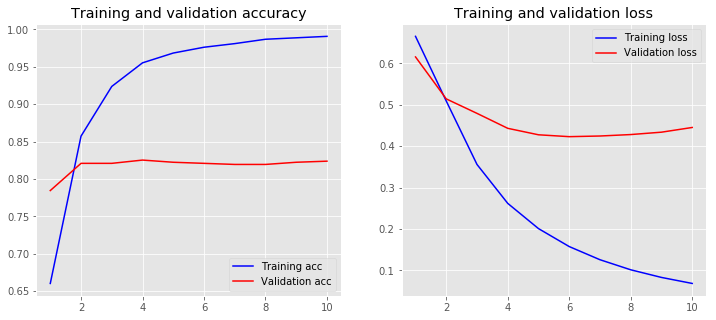

In [15]:
plot_history(history)


Ex: Find optimal hyperparameters

### ConvNet model

In [16]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(sentences_train[2])
print(X_train[2])
for word in ['the', 'all', 'happy', 'sad']:
    print('{}: {}'.format(word, tokenizer.word_index[word]))

Fantastic earphones.
[236, 1909]
the: 1
all: 33
happy: 194
sad: 819


In [17]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print(X_train[0, :])

[ 278  295  212 1907   39  349    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           230150    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 96, 128)           32128     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 263,579
Trainable params: 263,579
Non-trainable params: 0
_________________________________________________________________
Train on 2061 samples, validate on 687 samples
Epoch 1/10
2061/2061 [==============================] - 1s 497us/step - loss: 0.6680 - ac

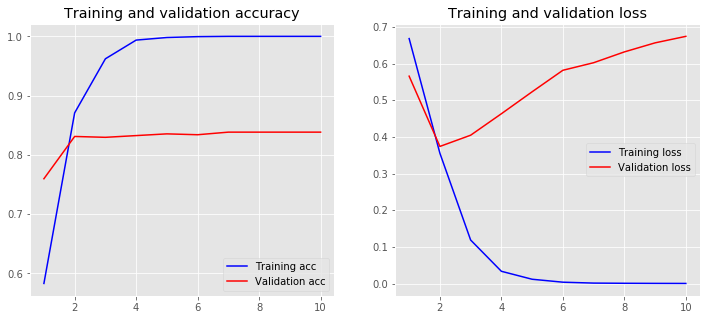

In [18]:
embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

Ex: Play with the net configuration and find the best parameters 